## Installations/Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Clinical Data

In [20]:
clinical_df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
clinical_df

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,brca_metabric,MTS-T2428,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,4.93,1:Recurred,1,Primary,Female,NaN,2.615035,27.0,1.0,NaN
2505,brca_metabric,MTS-T2429,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,16.18,1:Recurred,1,Primary,Female,NaN,5.230071,28.0,2.0,NaN
2506,brca_metabric,MTS-T2430,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,NaN,NaN,1,Primary,Female,NaN,7.845106,NaN,0.0,NaN
2507,brca_metabric,MTS-T2431,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,NaN,NaN,1,Primary,Female,NaN,9.152624,NaN,0.0,NaN


## Reduce to TMB and Subtype

In [71]:
clinical_df = clinical_df[["Patient ID", "TMB (nonsynonymous)", "Pam50 + Claudin-low subtype"]]
clinical_df = clinical_df[clinical_df["Pam50 + Claudin-low subtype"] != "NC"]
clinical_df = clinical_df.dropna().reset_index()
clinical_df

,index,Patient ID,TMB (nonsynonymous),Pam50 + Claudin-low subtype
0,0,MB-0000,0.000000,claudin-low
1,1,MB-0002,2.615035,LumA
2,2,MB-0005,2.615035,LumB
3,3,MB-0006,1.307518,LumB
4,4,MB-0008,2.615035,LumB
...,...,...,...,...
1969,1975,MB-7295,5.230071,LumA
1970,1976,MB-7296,7.845106,LumB
1971,1977,MB-7297,5.230071,LumB
1972,1978,MB-7298,19.612766,LumB


### Significance of Immunotherapy based on TMB

https://cancerci.biomedcentral.com/articles/10.1186/s12935-020-01472-9

https://bmcurol.biomedcentral.com/articles/10.1186/s12894-021-00795-7

### Separating by TMB

https://ascopubs.org/doi/abs/10.1200/JCO.2021.39.15_suppl.1091

https://jitc.bmj.com/content/6/1/157

In [72]:
tmb_threshold = 10
high = []
low = []
for index, row in clinical_df.iterrows():
    if row["TMB (nonsynonymous)"] >= tmb_threshold:
        high.append(1)
        low.append(0)
    else:
        high.append(0)
        low.append(1)
clinical_df["TMB-H"] = pd.Series(high)
clinical_df["TMB-L"] = pd.Series(low)
clinical_df

,index,Patient ID,TMB (nonsynonymous),Pam50 + Claudin-low subtype,TMB-H,TMB-L
0,0,MB-0000,0.000000,claudin-low,0,1
1,1,MB-0002,2.615035,LumA,0,1
2,2,MB-0005,2.615035,LumB,0,1
3,3,MB-0006,1.307518,LumB,0,1
4,4,MB-0008,2.615035,LumB,0,1
...,...,...,...,...,...,...
1969,1975,MB-7295,5.230071,LumA,0,1
1970,1976,MB-7296,7.845106,LumB,0,1
1971,1977,MB-7297,5.230071,LumB,0,1
1972,1978,MB-7298,19.612766,LumB,1,0


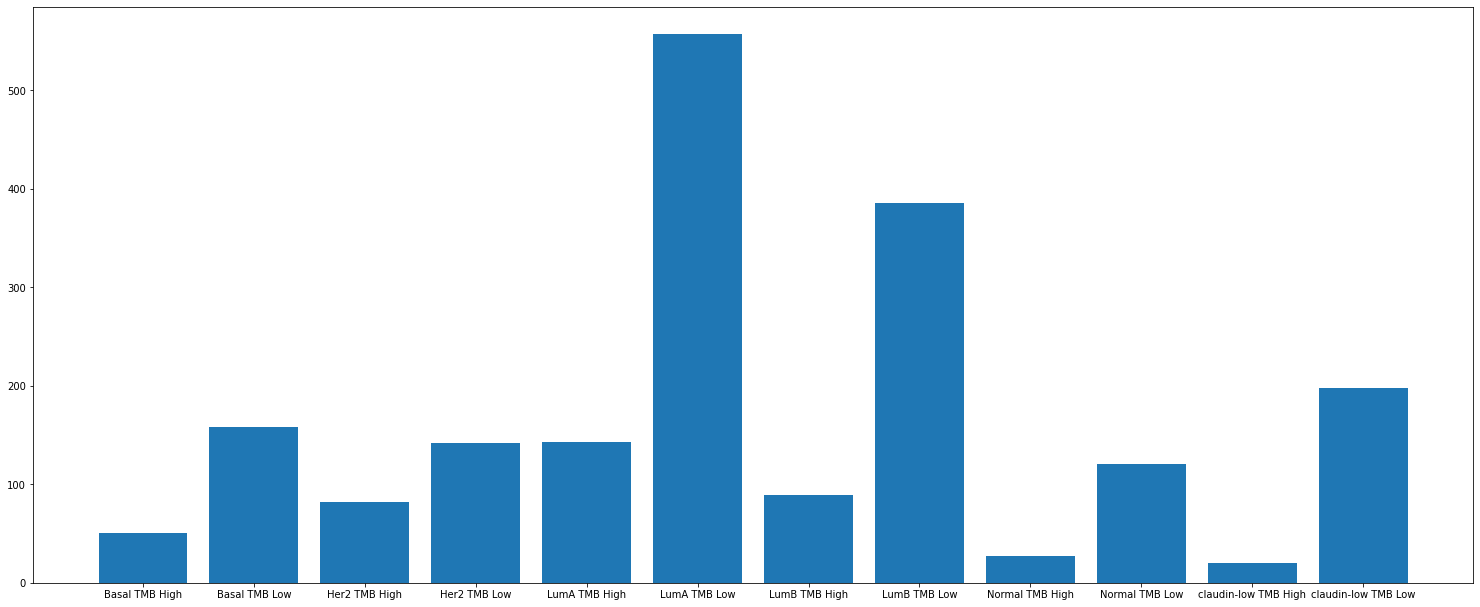

In [79]:
fig = plt.figure(1, [20, 8])
ax = fig.add_axes([0,0,1,1])
bar = clinical_df
bar["Pam50 + Claudin-low subtype high"] = bar["Pam50 + Claudin-low subtype"] + " TMB High"
bar["Pam50 + Claudin-low subtype low"] = bar["Pam50 + Claudin-low subtype"] + " TMB Low"
patients = list(bar["Pam50 + Claudin-low subtype high"].unique()) + list(bar["Pam50 + Claudin-low subtype low"].unique())
patients = list(np.sort(np.array(patients)))
subtypes = pd.Series([0] * 12)
subtypes.index = patients
for index, row in clinical_df.iterrows():
    if row["TMB-H"] == 1:
        subtypes[row["Pam50 + Claudin-low subtype"] + " TMB High"] += 1
    else:
        subtypes[row["Pam50 + Claudin-low subtype"] + " TMB Low"] += 1
ax.bar(patients,list(subtypes))
plt.show()

In [ ]:
clinical_df